#  Task 2
## Statement

$$
\frac{k}{\mu B}\Delta_x p(t, x) = \frac{V_b \phi c }{\alpha}\frac{\partial}{\partial t}p(t, x)\\
\frac{\partial}{\partial x}\big(\frac{k_x A_x}{\mu B} \frac{\partial p}{\partial x}\big) 
+ q
=\frac{V_b \phi c }{\alpha}\frac{\partial p}{\partial t}
$$

$$ \frac{\partial }{\partial t} p= \frac{1}{\alpha} \Delta p + q\\
\frac{\partial}{\partial x}p(0, t) = 0,\ \frac{\partial}{\partial x}p(L, t)=c_1,\ p(x, 0) = p_0
$$


<img src="figures/Task2.png">

## Numerical solution
$$\frac{1}{\mu B}\Big(\frac{k_{-\frac{1}{2}} A_{-\frac{1}{2}}}{\Delta x_{-\frac{1}{2}}}p_{-1}
- \big( \frac{k_{\frac{1}{2}} A_{\frac{1}{2}}}{\Delta x_{\frac{1}{2}}} + \frac{k_{-\frac{1}{2}} A_{-\frac{1}{2}}}{\Delta x_{-\frac{1}{2}}}\big)p_{0}
+\frac{k_{\frac{1}{2}} A_{\frac{1}{2}}}{\Delta x_{\frac{1}{2}}}p_{1}\Big) + q_0
= \frac{p^{n+1}_0 - p^{n}_0}{\Delta t} \frac{V_b \phi c}{\alpha}
$$
$\tilde{q}_0 = q_0 + \frac{1}{\mu B}\frac{k_{-\frac{1}{2}} A_{-\frac{1}{2}}}{\Delta x_{-\frac{1}{2}}}p_{-1}$, где $p_{-1}$ 


In [123]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [124]:
k = 1e-1 * 1.987e-13  # 1 darcy to m^2
dx = 1 # m
dy = 5 # m
c = 15.8e-10 # # Pa^-1
phi = 0.4
B = 1
mu = 2.9e-4  # m^2 / s
p_0 = 4e4 * 6894  # psi to Pa
nx = 7
d = 3  # m
dt = 1  # s
w = 2

In [125]:
lapl = np.zeros((nx, nx))
for dia in range(nx):
    lapl[dia, dia] = -2 * k * d * dy / dx
    if dia-1 >= 0:
        lapl[dia, dia-1] = k * d * dy / dx
    if dia+1 < nx:
        lapl[dia, dia+1] = k * d * dy / dx
# no flux for left bound        
lapl[0, 0] = -1 * k * d * dy / dx   
lapl *= 1 / (mu * B)

In [126]:
dt_coeff = dx * dy * d * phi * c / dt

In [ ]:
c_1 = 220 * 6894  # psi to Pa
q_w = -5e-4 # m3/s

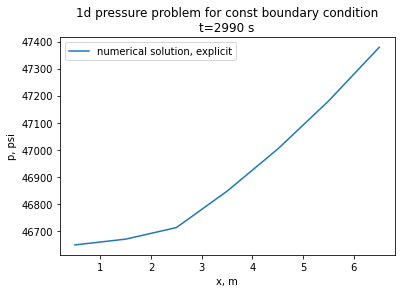

In [127]:
n_iter = int(3e3)
p_ex = np.ones((nx, 1)) * p_0
p_im = np.ones((nx, 1)) * p_0
t = 0
xs = list((np.linspace(0, nx-1, nx) + dx/2) * dx)
plot_freq = int(1e1)

q_tilde = np.zeros((nx, 1))
q_tilde[w, 0] = q_w
for i in range(1, n_iter):
    q_tilde[nx-1] = 1 / (mu * B) * k * dy * d / dx * (p_ex[nx-1][0] + dx * c_1) +  k * d * dy / (dx * mu * B)
    p_ex += 1 / dt_coeff * (lapl.dot(p_ex) + q_tilde)
    t += dt
    if i % plot_freq == 0:
        display.clear_output(wait=True)
        plt.plot(xs, p_ex / 6894, label=f'numerical solution, explicit')
        plt.xlabel('x, m')
        plt.ylabel('p, psi')
        plt.title(f'1d pressure problem for const boundary condition\nt={t} s')
        plt.legend()
        plt.show()